Este colab fue desarrollado por Arnold Charry Armero.

# Modelo de Localización Discreta

Un gerente considera
demandas regionales, tarifas, economías de escala y costos de factores agregados para decidir las regiones donde se ubicarán las instalaciones. Como ejemplo, consideremos SunOil, un fabricante de productos petroquímicos con ventas a nivel mundial. El vicepresidente de la cadena de suministro está considerando varias opciones para satisfacer la demanda. Una posibilidad es crear un centro en cada región. La ventaja de tal
enfoque es que reduce el costo de transporte y también ayuda a evitar los aranceles que pueden imponerse si
el producto se importa de otras regiones. La desventaja de este enfoque es que las plantas tienen un tamaño
para satisfacer la demanda local y es posible que no aprovechen plenamente las economías de escala. Un enfoque alternativo es
consolidar plantas en sólo unas pocas regiones. Esto mejora las economías de escala pero aumenta los costos y aranceles del transporte. Los datos de los costos variables de producción y transporte, y los costos fijos de la instalación de planta se adjuntan a continuación.

$ \mathbf{Nota. \:} \textit{Costos de Produccion y Transporte para la Region de Demanda por 1.000.000 de unidades} $

Región Suministrada | N. America | S. America | Europa | Asia | Africa | Costo Fijo BC | Baja Capacidad | Costo Fijo AC | Alta Capacidad |
--- | --- | --- | --- | --- | --- | --- |  --- |  --- |  --- |
N. America | 81 | 92 | 101 | 130 | 115 | 6000 | 10 | 9000 | 20 |
S. America | 117 | 77 | 108 | 98 | 100 | 4500 | 10 | 6750 | 20 |
Europa | 102 | 105 | 95 | 119 | 111 | 6500 | 10 | 9750 | 20 |
Asia | 115 | 125 | 90 | 59 | 74 | 4100 | 10 | 6150 | 20 |
Africa  | 142 | 100 | 103 | 105 | 71 | 4000 | 10 | 6000 | 20 |
Demanda  | 12 | 8 | 14 | 16 | 7 |



$ \mathbf{Figura \: 1. \:} \textit{Datos de Costos (En miles de dolares) y Datos de la Demanda (En millones de unidades) para SunOil} $

Con el fin de minimizar los costos, utilice un modelo de programación lineal que le permita tomar la mejor decisión de cuántas plantas abrir y en qué ubicaciones.

## Formulación del Problema

### Conjuntos

$ i = \textrm{Conjunto de posibles localizaciones de plantas, indexado por} \:  i$

$ j = \textrm{Conjunto de mercados, indexado por} \:  j$

### Parámetros

$ n = \textrm{Numero de localizaciones potenciales de plantas} $

$ m = \textrm{Numero de mercados o puntos de demanda} $

$ D_{j} = \textrm{Demanda anual desde el mercado } j$

$ k_{i} = \textrm{Baja capacidad de la planta } i$

$ K_{i} = \textrm{Alta capacidad de la planta } i$

$ f_{i} = \textrm{Costo fijo anual de mantener la planta de capacidad baja } i \textrm{ abierta}$

$ F_{i} = \textrm{Costo fijo anual de mantener la planta de capacidad alta } i \textrm{ abierta}$

$ c_{ij} = \textrm{Costo de producir y transportar una unidad desde la planta } i \textrm{ al mercado } j$



### Variables de decisión

$ x_{ij} = \textrm{Cantidad enviada desde la planta } i \textrm{ al mercado } j$

$ y_{i} = \textrm{1 si la planta con baja capacidad } i \textrm{ se abre, 0 lo contrario}$

$ z_{i} = \textrm{1 si la planta con alta capacidad } i \textrm{ se abre, 0 lo contrario}$

Dando la siguiente función objetivo,

### Función Objetivo


$$ \mathit{Min} \sum_{i = i}^{n}f_{i}\: y_{i} + \sum_{i = i}^{n}F_{i}\: z_{i} + \sum_{i = 1}^{n}\sum_{j = 1}^{m}c_{ij} \: x_{ij} $$

### Restricciones

$\mathit{s.a}:$

Se debe satisfacer la demanda de cada mercado $j$

$$ \sum_{i = 1}^{n}x_{ij} = D_{j}, \: \forall j $$

Una planta no puede producir más que su capacidad (ya sea baja o alta capacidad)

$$ \sum_{j = 1}^{m}x_{ij} \leq k_{i} y_{i} + K_{i} z_{i}, \: \forall i $$

Se obtienen dos variables binarias y una entera positiva

$$ y_{i} \in  \left \{ 0, 1 \right \},  z_{i} \in  \left \{ 0, 1 \right \}, x_{ij}\geq 0$$

Ahora se procede con la programación del modelo.

In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 32.6 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
plantas = range(5)
mercados = range(5)

Se ingresan manualmente los Parámetros,


In [ ]:
#Parámetros
D = [12, 8, 14, 16, 7]

f = [6000, 4500, 6500, 4100, 4000]

k = [10, 10, 10, 10, 10]

F = [9000, 6750, 9750, 6150, 6000]

K = [20, 20, 20, 20, 20]

C = [ #Mercados
    #NA  SA  EU    AS   AF
    [81, 92, 101, 130, 115], #NA
    [117, 77, 108, 98, 100],  #SA  Plantas
    [102, 105, 95, 119, 111], #EU
    [115, 125, 90, 59, 74], #AS
    [142, 100, 103, 105, 71] #AF
    ]

Se ingresa y se resuelve el modelo con PuLP,

In [ ]:
#Se crea la instancia del modelo
model = LpProblem(name = "Localización_Discreta", sense = LpMinimize)

#Inicialización de las variables de decisión
X = LpVariable.dicts("X", (plantas, mercados), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (plantas), 0, 1, LpInteger)
Z = LpVariable.dicts("Z", (plantas), 0, 1, LpInteger)

#Se agrega la función objetivo
model += lpSum([f[i] * Y[i] for i in plantas]) + lpSum([F[i] * Z[i] for i in plantas]) + lpSum([[C[i][j] * X[i][j] for i in plantas] for j in mercados])

#Restricciones

#Se debe satisfacer la demanda de cada mercado
for j in mercados:
  model += lpSum([X[i][j] for i in plantas]) == D[j]

#No se debe sobrepasar la capacidad de cada planta
for i in plantas:
  model += lpSum([X[i][j] for j in mercados]) <= k[i] * Y[i] + K[i] * Z[i]

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

#Se imprime la función objetivo
print("Costo Total = $", value(model.objective))

Status Optimal
X_0_0 = 0.0
X_0_1 = 0.0
X_0_2 = 0.0
X_0_3 = 0.0
X_0_4 = 0.0
X_1_0 = 12.0
X_1_1 = 8.0
X_1_2 = 0.0
X_1_3 = 0.0
X_1_4 = 0.0
X_2_0 = 0.0
X_2_1 = 0.0
X_2_2 = 0.0
X_2_3 = 0.0
X_2_4 = 0.0
X_3_0 = 0.0
X_3_1 = 0.0
X_3_2 = 4.0
X_3_3 = 16.0
X_3_4 = 0.0
X_4_0 = 0.0
X_4_1 = 0.0
X_4_2 = 10.0
X_4_3 = 0.0
X_4_4 = 7.0
Y_0 = 0.0
Y_1 = 0.0
Y_2 = 0.0
Y_3 = 0.0
Y_4 = 0.0
Z_0 = 0.0
Z_1 = 1.0
Z_2 = 0.0
Z_3 = 1.0
Z_4 = 1.0
Costo Total = $ 23751.0


In [ ]:
# Se realiza una matriz con los resultados xij
import pandas as pd
i = 0
list_x = []
df = pd.DataFrame()
for v in range(len(plantas) * len(mercados) + 1):
  value = model.variables()[i].varValue
  list_x.append(value)
  i += 1
  if i % 5 == 0:
    list_x = dict(map(lambda i,j : (i, j) , mercados, list_x))
    list_x = pd.Series(list_x)
    df = pd.concat([df, list_x.to_frame().T], ignore_index=True)
    list_x = []
df

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,12.0,8.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,4.0,16.0,0.0
4,0.0,0.0,10.0,0.0,7.0


In [ ]:
# Se realiza una matriz con los resultados yi y zi
import pandas as pd
i = 0
list_x = []
df = pd.DataFrame()
for v in range(len(plantas) * len(mercados), len(model.variables())):
  value = model.variables()[i + len(plantas) * len(mercados)].varValue
  list_x.append(value)
  i += 1
  if i % 5 == 0:
    list_x = dict(map(lambda i,j : (i, j) , mercados, list_x))
    list_x = pd.Series(list_x)
    df = pd.concat([df, list_x.to_frame().T], ignore_index=True)
    list_x = []
df

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0


## Cargar Datos de Excel al Modelo PuLP

Ahora, se realiza el mismo modelo, pero importando los datos desde un Excel para no tener la necesidad de escribir parámetro por parámetro manualmente.

In [ ]:
#Se instala la libreria para leer archivos de Excel
!pip install openpyxl

In [ ]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se ingresan los datos desde un Excel,

In [ ]:
from pulp import *
from openpyxl import load_workbook

libro = load_workbook('/content/drive/MyDrive/Operations II/Datos SunOil - Localización Discreta.xlsx')
hoja = libro["Hoja1"]

#Se cargan los datos en listas

#Conjuntos
plantas = range(5)
mercados = range(5)

#Parámetros
D = [hoja.cell(row = 9, column = i).value for i in range(2, 7)]

f = [hoja.cell(row = i, column = 7).value for i in range(4, 9)]

k = [hoja.cell(row = i, column = 8).value for i in range(4, 9)]

F = [hoja.cell(row = i, column = 9).value for i in range(4, 9)]

K = [hoja.cell(row = i, column = 10).value for i in range(4, 9)]

C = [[hoja.cell(row = i, column = j).value for j in range(2, 7)] for i in range(4, 9)]

Se ingresa y se resuelve el modelo con PuLP,

In [ ]:
#Se crea la instancia del modelo
model = LpProblem(name = "Localización_Discreta", sense = LpMinimize)

#Inicialización de las variables de decisión
X = LpVariable.dicts("X", (plantas, mercados), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (plantas), 0, 1, LpInteger)
Z = LpVariable.dicts("Z", (plantas), 0, 1, LpInteger)

#Se agrega la función objetivo
model += lpSum([f[i] * Y[i] for i in plantas]) + lpSum([F[i] * Z[i] for i in plantas]) + lpSum([[C[i][j] * X[i][j] for i in plantas] for j in mercados])

#Restricciones

#Se debe satisfacer la demanda de cada mercado
for j in mercados:
  model += lpSum([X[i][j] for i in plantas]) == D[j]

#No se debe sobrepasar la capacidad de cada planta
for i in plantas:
  model += lpSum([X[i][j] for j in mercados]) <= k[i] * Y[i] + K[i] * Z[i]

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

#Se imprime la función objetivo
print("Costo Total = $", value(model.objective))

Status Optimal
X_0_0 = 0.0
X_0_1 = 0.0
X_0_2 = 0.0
X_0_3 = 0.0
X_0_4 = 0.0
X_1_0 = 12.0
X_1_1 = 8.0
X_1_2 = 0.0
X_1_3 = 0.0
X_1_4 = 0.0
X_2_0 = 0.0
X_2_1 = 0.0
X_2_2 = 0.0
X_2_3 = 0.0
X_2_4 = 0.0
X_3_0 = 0.0
X_3_1 = 0.0
X_3_2 = 4.0
X_3_3 = 16.0
X_3_4 = 0.0
X_4_0 = 0.0
X_4_1 = 0.0
X_4_2 = 10.0
X_4_3 = 0.0
X_4_4 = 7.0
Y_0 = 0.0
Y_1 = 0.0
Y_2 = 0.0
Y_3 = 0.0
Y_4 = 0.0
Z_0 = 0.0
Z_1 = 1.0
Z_2 = 0.0
Z_3 = 1.0
Z_4 = 1.0
Costo Total = $ 23751.0


In [ ]:
# Se realiza una matriz con los resultados xij
import pandas as pd
i = 0
list_x = []
df = pd.DataFrame()
for v in range(len(plantas) * len(mercados) + 1):
  value = model.variables()[i].varValue
  list_x.append(value)
  i += 1
  if i % 5 == 0:
    list_x = dict(map(lambda i,j : (i, j) , mercados, list_x))
    list_x = pd.Series(list_x)
    df = pd.concat([df, list_x.to_frame().T], ignore_index=True)
    list_x = []
df

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,12.0,8.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,4.0,16.0,0.0
4,0.0,0.0,10.0,0.0,7.0


In [ ]:
# Se realiza una matriz con los resultados yi y zi
import pandas as pd
i = 0
list_x = []
df = pd.DataFrame()
for v in range(len(plantas) * len(mercados), len(model.variables())):
  value = model.variables()[i + len(plantas) * len(mercados)].varValue
  list_x.append(value)
  i += 1
  if i % 5 == 0:
    list_x = dict(map(lambda i,j : (i, j) , mercados, list_x))
    list_x = pd.Series(list_x)
    df = pd.concat([df, list_x.to_frame().T], ignore_index=True)
    list_x = []
df

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0


## Utilizar Strings como Conjuntos

Para que se nos indique de cuál ubicación a qué otra localización se entregan las unidades de productos utilizando los nombres de las ciudades, se emplean diccionarios.  

In [ ]:
from pulp import *
from openpyxl import load_workbook, Workbook

libro = load_workbook('/content/drive/MyDrive/Operations II/Datos SunOil - Localización Discreta.xlsx')
hoja = libro["Hoja1"]

#Se cargan los datos en listas

#Conjuntos
plantas = [hoja.cell(row = i, column = 1).value for i in range(4, 9)]
mercados = [hoja.cell(row = 3, column = i).value for i in range(2, 7)]

#Parámetros
D = [hoja.cell(row = 9, column = i).value for i in range(2, 7)]

f = [hoja.cell(row = i, column = 7).value for i in range(4, 9)]

k = [hoja.cell(row = i, column = 8).value for i in range(4, 9)]

F = [hoja.cell(row = i, column = 9).value for i in range(4, 9)]

K = [hoja.cell(row = i, column = 10).value for i in range(4, 9)]

C = [[hoja.cell(row = i, column = j).value for j in range(2, 7)] for i in range(4, 9)]

#Se crean los diccionarios
D = makeDict([mercados], D, 0)

f = makeDict([plantas], f, 0)

k = makeDict([plantas], k, 0)

F = makeDict([plantas], F, 0)

K = makeDict([plantas], K, 0)

C = makeDict([plantas, mercados], C, 0)

Se ingresa y se resuelve el modelo con PuLP,

In [ ]:
#Se crea la instancia del modelo
model = LpProblem(name = "Localización_Discreta", sense = LpMinimize)

#Inicialización de las variables de decisión
X = LpVariable.dicts("X", (plantas, mercados), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (plantas), 0, 1, LpInteger)
Z = LpVariable.dicts("Z", (plantas), 0, 1, LpInteger)

#Se agrega la función objetivo
model += lpSum([f[i] * Y[i] for i in plantas]) + lpSum([F[i] * Z[i] for i in plantas]) + lpSum([[C[i][j] * X[i][j] for i in plantas] for j in mercados])

#Restricciones

#Se debe satisfacer la demanda de cada mercado
for j in mercados:
  model += lpSum([X[i][j] for i in plantas]) == D[j]

#No se debe sobrepasar la capacidad de cada planta
for i in plantas:
  model += lpSum([X[i][j] for j in mercados]) <= k[i] * Y[i] + K[i] * Z[i]

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

#Se imprime la función objetivo
print("Costo Total = $", value(model.objective))

Status Optimal
X_Africa_Africa = 7.0
X_Africa_Asia = 0.0
X_Africa_Europe = 10.0
X_Africa_N._America = 0.0
X_Africa_S._America = 0.0
X_Asia_Africa = 0.0
X_Asia_Asia = 16.0
X_Asia_Europe = 4.0
X_Asia_N._America = 0.0
X_Asia_S._America = 0.0
X_Europe_Africa = 0.0
X_Europe_Asia = 0.0
X_Europe_Europe = 0.0
X_Europe_N._America = 0.0
X_Europe_S._America = 0.0
X_N._America_Africa = 0.0
X_N._America_Asia = 0.0
X_N._America_Europe = 0.0
X_N._America_N._America = 0.0
X_N._America_S._America = 0.0
X_S._America_Africa = 0.0
X_S._America_Asia = 0.0
X_S._America_Europe = 0.0
X_S._America_N._America = 12.0
X_S._America_S._America = 8.0
Y_Africa = 0.0
Y_Asia = 0.0
Y_Europe = 0.0
Y_N._America = 0.0
Y_S._America = 0.0
Z_Africa = 1.0
Z_Asia = 1.0
Z_Europe = 0.0
Z_N._America = 0.0
Z_S._America = 1.0
Costo Total = $ 23751.0


In [ ]:
# Se realiza una matriz con los resultados xij
import pandas as pd
plantas.sort()
mercados.sort()
i = 0
list_x = []
df = pd.DataFrame()
for v in range(len(plantas) * len(mercados) + 1):
  value = model.variables()[i].varValue
  list_x.append(value)
  i += 1
  if i % 5 == 0:
    list_x = dict(map(lambda i,j : (i, j) , mercados, list_x))
    list_x = pd.Series(list_x)
    df = pd.concat([df, list_x.to_frame().T], ignore_index=True)
    list_x = []
df.insert(loc = 5, column = "Plantas", value = plantas)
df.set_index("Plantas", inplace=True)
df

,Africa,Asia,Europe,N. America,S. America
Plantas,,,,,
Africa,7.0,0.0,10.0,0.0,0.0
Asia,0.0,16.0,4.0,0.0,0.0
Europe,0.0,0.0,0.0,0.0,0.0
N. America,0.0,0.0,0.0,0.0,0.0
S. America,0.0,0.0,0.0,12.0,8.0


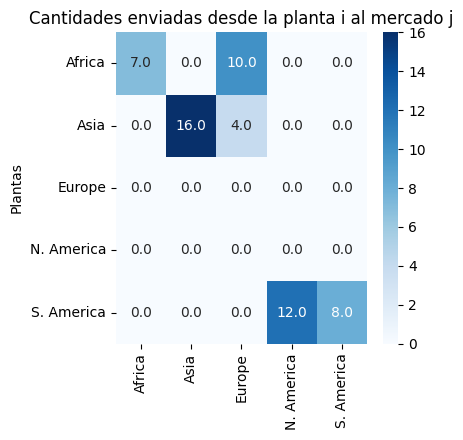

In [ ]:
#Se realiza un gráfico de calor
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (4.5, 4.5))
sns.heatmap(df, annot = True, cmap = 'Blues', fmt = ".1f")
ax.set_title("Cantidades enviadas desde la planta i al mercado j")
fig.tight_layout()
plt.show()

In [ ]:
# Se realiza una matriz con los resultados yi y zi
import pandas as pd
Capacidad = ["Baja Capacidad", "Alta Capacidad"]
i = 0
list_x = []
df = pd.DataFrame()
for v in range(len(plantas) * len(mercados), len(model.variables())):
  value = model.variables()[i + len(plantas) * len(mercados)].varValue
  list_x.append(value)
  i += 1
  if i % 5 == 0:
    list_x = dict(map(lambda i,j : (i, j) , mercados, list_x))
    list_x = pd.Series(list_x)
    df = pd.concat([df, list_x.to_frame().T], ignore_index=True)
    list_x = []
df.insert(loc = 5, column = "Capacidad", value = Capacidad)
df.set_index("Capacidad", inplace=True)
df

,Africa,Asia,Europe,N. America,S. America
Capacidad,,,,,
Baja Capacidad,0.0,0.0,0.0,0.0,0.0
Alta Capacidad,1.0,1.0,0.0,0.0,1.0


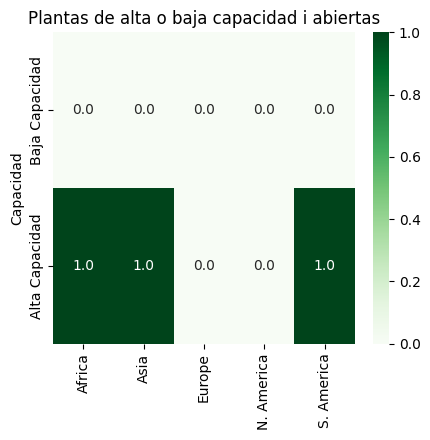

In [ ]:
#Se realiza otro gráfico de calor
fig, ax = plt.subplots(figsize = (4.5, 4.5))
sns.heatmap(df, annot = True, cmap = 'Greens', fmt = ".1f")
ax.set_title("Plantas de alta o baja capacidad i abiertas")
fig.tight_layout()
plt.show()

In [ ]:
#Guardando los resultados en Excel
libroRes = Workbook()
hojaRes = libroRes.active

i = 1

for v in model.variables():
  hojaRes.cell(row = i, column = 1).value = v.name
  hojaRes.cell(row = i, column = 2).value = v.varValue
  i += 1

libroRes.save('Resultados.xlsx')

#### Referencias


*   Andres Felipe Osorio Muriel. (2021, August 24). Tutorial PULP [Video]. YouTube. https://www.youtube.com/watch?v=wIqE4guJlEM
*   Chopra, S., & Meindl, P. (2000). Supply Chain Management: strategy, planning and operations. http://ci.nii.ac.jp/ncid/BB10149318
*   RESEARCH HUB. (2022, February 16). SCM (19): Capacitated Plant Location Model Solution | SunOil Example [Video]. YouTube. https://www.youtube.com/watch?v=xBvf2AVqhPA


